In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [8]:
wine=pd.read_csv('WineQT.csv')

In [9]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
wine.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [13]:
wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
x=wine.iloc[:,:-1]
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [16]:
y=wine.iloc[:,-1]
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


C:\Users\heman\AppData\Local\Temp\ipykernel_2236\3304093463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(wine['quality'])


<Axes: xlabel='quality', ylabel='Density'>

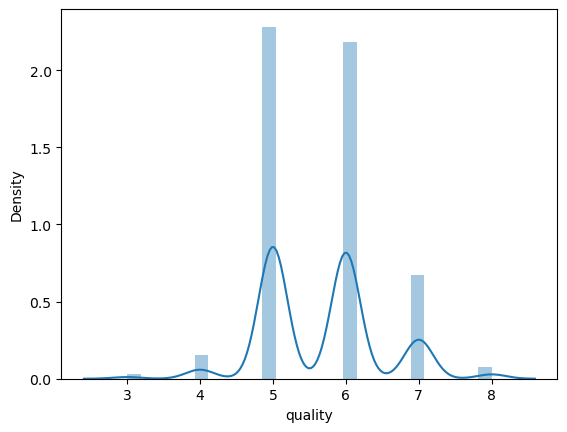

In [18]:
sb.distplot(wine['quality'])

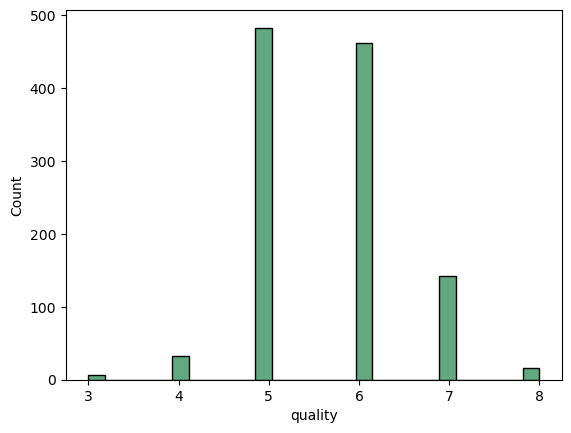

In [21]:
sb.histplot(wine['quality'],color='seagreen')
plt.show()

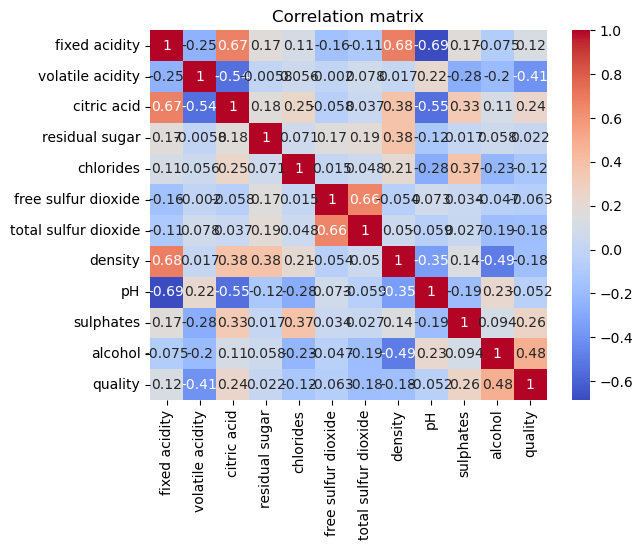

In [25]:
co_matrix=wine.corr()
sb.heatmap(co_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

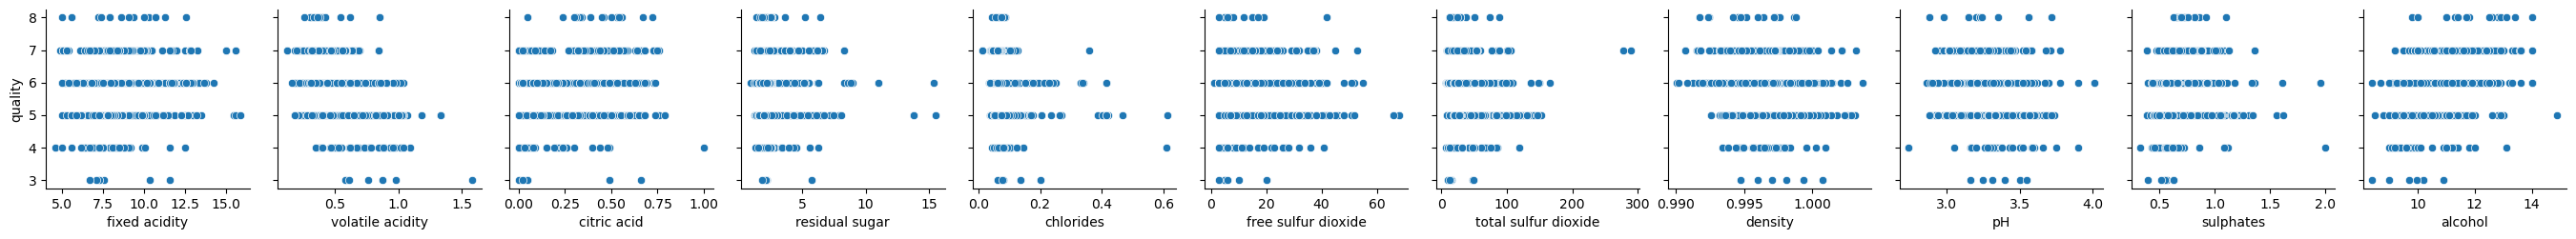

In [30]:
sb.pairplot(wine,x_vars=['fixed acidity',
'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],y_vars=['quality'],kind='scatter')
plt.show()


In [32]:
#Training and testing
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
winelr=LinearRegression()

In [35]:
winelr.fit(x_train,y_train)

LinearRegression()

In [36]:
winelr.coef_

array([ 8.15580676e-02, -1.21435242e+00, -2.60061158e-01,  1.79779723e-02,
       -1.30742127e+00,  2.90526956e-03, -2.16070011e-03, -5.36441218e+01,
       -1.04062858e-01,  8.03185245e-01,  2.72626959e-01])

In [37]:
pd.DataFrame(winelr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.081558
volatile acidity,-1.214352
citric acid,-0.260061
residual sugar,0.017978
chlorides,-1.307421
free sulfur dioxide,0.002905
total sulfur dioxide,-0.002161
density,-53.644122
pH,-0.104063
sulphates,0.803185


In [44]:
pr=winelr.predict(x_test)
print(pr)

[5.15846955 4.98182366 5.09573857 4.9954319  6.42766992 5.26809162
 5.62886271 5.30223258 5.82218434 5.71614867 5.12941636 5.27745435
 5.42021388 5.48027565 5.4634652  5.16939994 5.51646601 5.52120564
 6.61775076 5.09996694 5.66277605 4.93824328 5.01663635 5.81565159
 5.20921163 5.60736393 6.11623321 6.12438079 5.86570938 5.37370034
 5.53237587 5.39825839 5.4840022  5.84047106 6.02138301 5.1776786
 5.37878229 5.32098477 5.74606059 5.19776293 6.25663714 4.70566774
 5.64535898 5.66517687 5.42119261 6.58876575 5.12960521 5.14508951
 6.50256475 4.98419169 5.88205741 6.30559397 6.57249906 5.48453651
 7.779834   5.51384478 5.34284032 6.50681548 5.32098477 5.7125856
 5.67841653 6.04603832 6.07427254 5.44674626 5.20500738 6.22218653
 5.58415636 5.54076535 5.40440825 5.41718814 5.40073127 6.14324319
 5.75135795 4.91807243 5.14858788 5.11084609 5.55463215 5.62227838
 6.06881309 5.46602707 5.25197151 5.32424645 5.18029542 5.32156269
 5.62701463 5.32665706 5.20660195 5.21177856 5.5399076  4.921740

In [39]:
r2_score(y_test,pr)

0.29228997509179944

In [40]:
mean_absolute_error(y_test,pr)

0.490979573449642

In [41]:
mean_squared_error(y_test,pr)

0.42289051201394673

In [42]:
winelr.predict([[8,0.5,0.15,1.9,0.07,23.0,35.0,0.92,3.5,0.65,10.2]])

C:\Users\heman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.78427255])